In [24]:
from brian2 import *
import numpy as np

simtime = 30*second # Simulation time

In [38]:
alpha=0.9
start_scope()
network = Network()
input1 = NeuronGroup(1, 'rates: Hz', threshold='rand()<rates*dt')
input2 = NeuronGroup(1, 'rates: Hz', threshold='rand()<rates*dt')
result = NeuronGroup(1, 'rates: Hz', threshold='rand()<rates*dt')
M1 = SpikeMonitor(input1)
M2 = SpikeMonitor(input2)
O = SpikeMonitor(result)
network.add(input1)
network.add(input2)
network.add(result)
network.add(M1)
network.add(M2)
network.add(O)

for stim in range(int(simtime/second)):
    value1 = np.random.randint(low=0, high=2)
    value2 = np.random.randint(low=0, high=2)
    input1.rates = 100 * Hz * (alpha * value1 + (1-alpha) * np.random.rand())
    input2.rates = 100 * Hz * (alpha * value2 + (1-alpha) * np.random.rand())    
    result.rates = 100 * Hz * (value1 != value2)
    network.run(1*second, report='text')

Starting simulation at t=0. s for a duration of 1. s
1.0 (100%) simulated in 2s
Starting simulation at t=1. s for a duration of 1. s
1.0 (100%) simulated in < 1s
Starting simulation at t=2. s for a duration of 1. s
1.0 (100%) simulated in < 1s
Starting simulation at t=3. s for a duration of 1. s
1.0 (100%) simulated in < 1s
Starting simulation at t=4. s for a duration of 1. s
1.0 (100%) simulated in < 1s
Starting simulation at t=5. s for a duration of 1. s
1.0 (100%) simulated in < 1s
Starting simulation at t=6. s for a duration of 1. s
1.0 (100%) simulated in < 1s
Starting simulation at t=7. s for a duration of 1. s
1.0 (100%) simulated in < 1s
Starting simulation at t=8. s for a duration of 1. s
1.0 (100%) simulated in < 1s
Starting simulation at t=9. s for a duration of 1. s
1.0 (100%) simulated in < 1s
Starting simulation at t=10. s for a duration of 1. s
1.0 (100%) simulated in < 1s
Starting simulation at t=11. s for a duration of 1. s
1.0 (100%) simulated in < 1s
Starting simulat

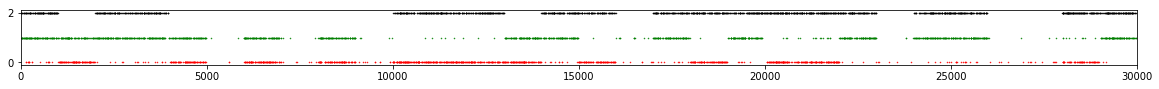

In [39]:
plt.figure(figsize=[20, 1])
plot(M1.t/ms, M1.i, '.r', markersize=1)
plot(M2.t/ms, 1+M2.i, '.g', markersize=1)
plot(O.t/ms, 2+O.i, '.k', markersize=1)
xlim(0, 1000 * simtime/second)
show()